In [3]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Mounted at /content/drive


In [158]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
base_path = Path('/content/drive/MyDrive/solvro_dane') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

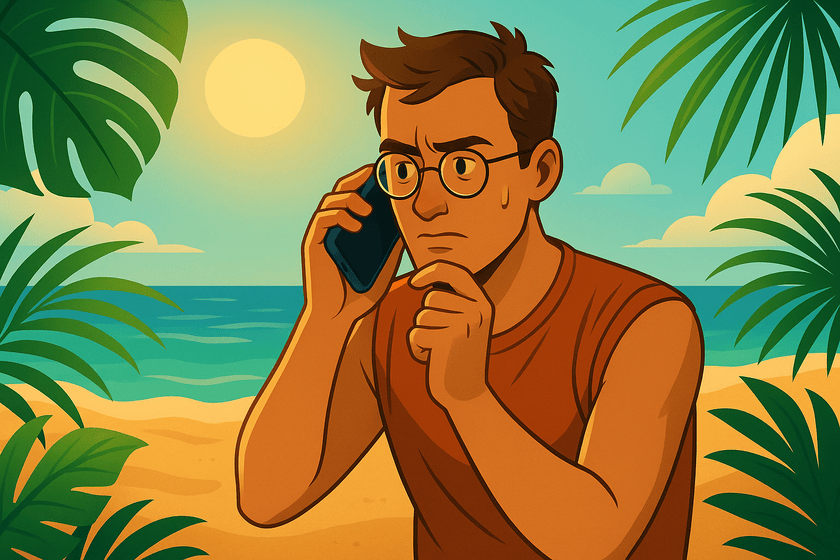

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [156]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [137]:
titanic_df = titanic_df.drop(columns = ["Name","Ticket","Cabin","Embarked"])
titanic_df
#Usuwamy nieistotne dla naszej analizy kolumny np. Imie nie ma wplywu na to czy ktos przezyl czy nie

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [138]:
missing_rows=titanic_df.isna().sum(axis = 0)
missing_rows
#Sprawdzamy brakujące wartości w kolumnach, można zauważyć takie wartości w kolumnach Age oraz Fare

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,98


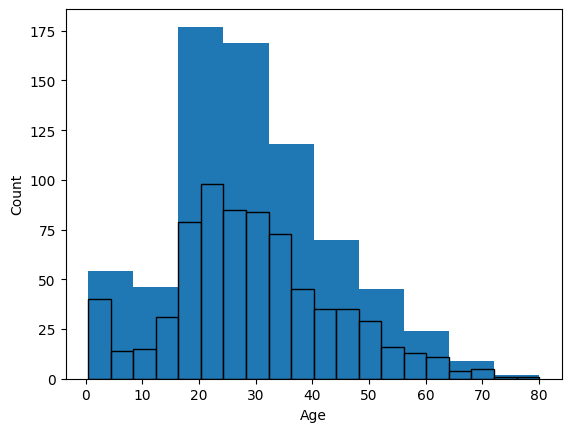

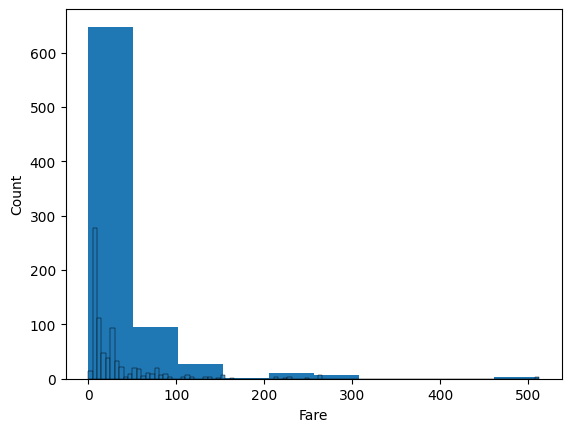

In [139]:
#Sprawdzamy rozkłady zmiennych z wartośćami brakującymi
plt.hist(titanic_df["Age"])
sns.histplot(data=titanic_df, x='Age')
plt.show()

plt.hist(titanic_df["Fare"])
sns.histplot(data=titanic_df, x='Fare')
plt.show()
#Kolumny Age i Fare mają rozkład asymetryczny, więc bedzięmy zastępować brakujące wartości medianą

In [140]:
#Zastępujemy brakująće wartości medianą
missing_ages = titanic_df["Age"].isna()
missing_prices = titanic_df["Fare"].isna()
titanic_df.loc[missing_ages,"Age"] = titanic_df["Age"].median()
titanic_df.loc[missing_prices,"Fare"] = titanic_df["Fare"].median()
missing_rows=titanic_df.isna().sum(axis = 0)
missing_rows

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [148]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df

,Survived,Pclass,Sex,Age,Fare,Is_Old,Is_Expensive,Has_Family
PassengerId,,,,,,,,
1,0,3,0,22,7.2500,0,0,1
2,1,1,1,38,71.2833,1,1,1
3,1,3,1,26,7.9250,0,0,0
4,1,1,1,35,53.1000,1,1,1
5,0,3,0,35,8.0500,1,0,0
...,...,...,...,...,...,...,...,...
887,0,2,0,27,13.0000,0,0,0
888,1,1,1,19,30.0000,0,1,0
889,0,3,1,28,23.4500,0,1,1


In [141]:
#Sprawdzamy typy danych
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64


In [142]:
#Zmieniamy wartości w kolumnie Age z float na int
titanic_df["Age"]=titanic_df["Age"].astype(int)
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,int64
SibSp,int64
Parch,int64
Fare,float64


In [143]:
#Tworzymy kolmnę kategoriałną dzielącą ludzi według zapłaconj ceny za bilet. 0 - Tani bilet, 1 - Drogi bilet
#Tworzymy 2 kolumnę kategorialną dzielącą ludzi według wieku na starszych i młodszych. 0 - Młodszy, 1 - Starszy
titanic_df["Is_Old"] = (titanic_df["Age"] > np.median(titanic_df["Age"])).astype(int)
titanic_df["Is_Expensive"] = (titanic_df["Fare"] > np.median(titanic_df["Fare"])).astype(int)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Is_Old,Is_Expensive
PassengerId,,,,,,,,,
1,0,3,male,22,1,0,7.2500,0,0
2,1,1,female,38,1,0,71.2833,1,1
3,1,3,female,26,0,0,7.9250,0,0
4,1,1,female,35,1,0,53.1000,1,1
5,0,3,male,35,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,0,0
888,1,1,female,19,0,0,30.0000,0,1
889,0,3,female,28,1,2,23.4500,0,1


In [144]:
#Funkcja pozwalająca nam zobaczyć na wykresie outlinery
def boxplot(df, column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

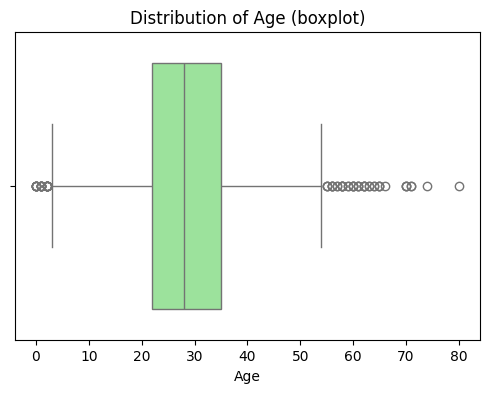

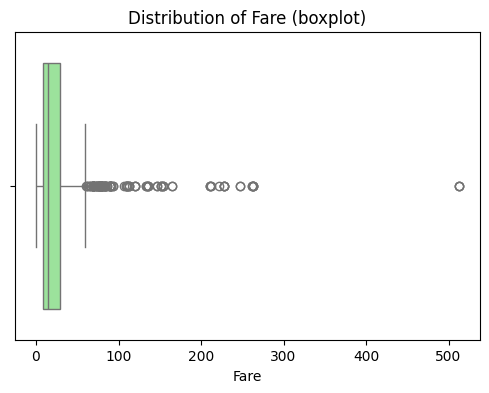

In [115]:
boxplot(titanic_df,"Age")
boxplot(titanic_df,"Fare")
#Kropki na wykresach stanowią outliery.

In [147]:
#Sprawdzamy outlinery w kolumnach kategorialnych
(titanic_df["Pclass"].value_counts(normalize=True) * 100).round(2)# Brak outlierów

,proportion
Pclass,
3,55.11
1,24.24
2,20.65


In [145]:
(titanic_df["Parch"].value_counts(normalize=True) * 100).round(2) # Aż 76% stanowi jedna klasa

,proportion
Parch,
0,76.09
1,13.24
2,8.98
5,0.56
3,0.56
4,0.45
6,0.11


In [111]:
(titanic_df["SibSp"].value_counts(normalize=True) * 100).round(2) #68% wartości stanowi jedna klasa

,proportion
SibSp,
0,68.24
1,23.46
2,3.14
4,2.02
3,1.80
8,0.79
5,0.56


In [146]:
#Można zauważyć, że większość ludzi na pokładzie ma 0 w kolumnach Sibsp oraz Parch, możemy połączyć te kolumny w jedna binarną: "Has_Family"
titanic_df["Has_Family"] = np.where((titanic_df["SibSp"] > 0) | (titanic_df["Parch"] > 0), 1, 0)
titanic_df.drop(columns=["SibSp", "Parch"], inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,Fare,Is_Old,Is_Expensive,Has_Family
PassengerId,,,,,,,,
1,0,3,male,22,7.2500,0,0,1
2,1,1,female,38,71.2833,1,1,1
3,1,3,female,26,7.9250,0,0,0
4,1,1,female,35,53.1000,1,1,1
5,0,3,male,35,8.0500,1,0,0
...,...,...,...,...,...,...,...,...
887,0,2,male,27,13.0000,0,0,0
888,1,1,female,19,30.0000,0,1,0
889,0,3,female,28,23.4500,0,1,1


In [117]:
def plot_correlation_matrix(df):
    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

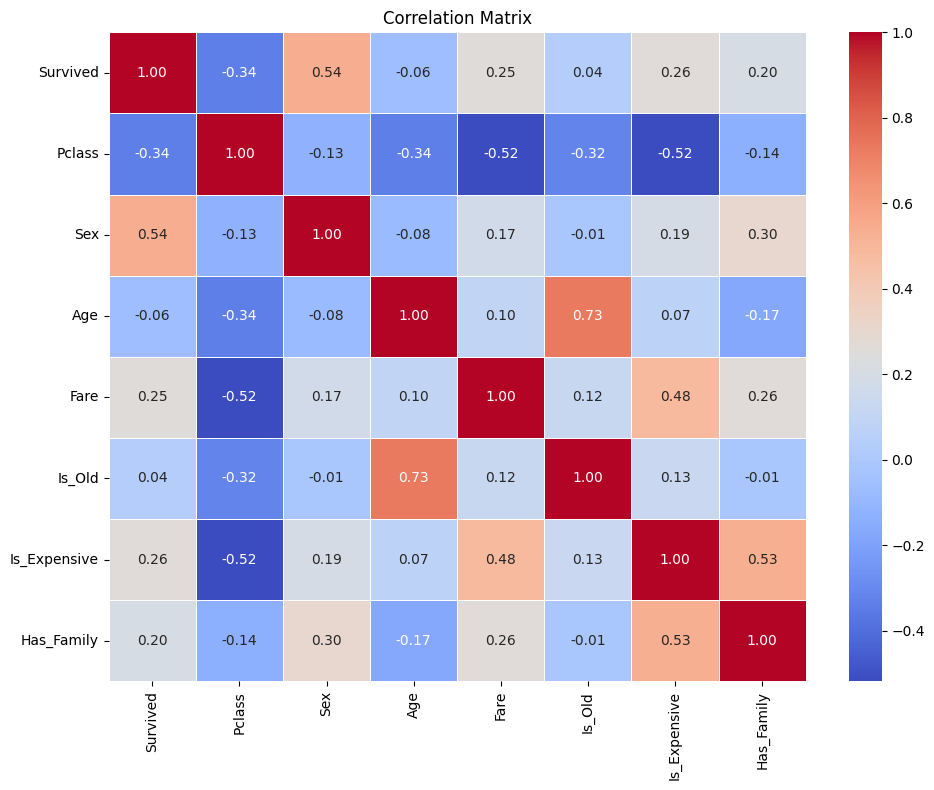

In [149]:
# Sprawdzamy korelację cech z predykowaną klasą Survived
plot_correlation_matrix(titanic_df)
# Można zauważyc pewną korelację w każdej z cech poza tymi związanymi z wiekiem